In [1]:
import torch
from smaksimovich.torch_utils import SimpleDataset

x = []
y = []
with open("tictactoe_solved.csv", "r") as file:
    lines = file.read().split('\n')
    for line in lines:
        if len(line) == 0:
            continue
        line = line.split(',')
        x_i = torch.tensor( list(map(float, line[:27])), dtype=torch.float)
        y_i = torch.tensor( list(map(float, line[27:])), dtype=torch.float)
        assert len(y_i) == 10
        x.append(x_i)
        y.append(y_i)

dataset = SimpleDataset(x, y)

for i in range(3):
    print(x[i], y[i])

tensor([0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 0.]) tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 1.])
tensor([0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
        1., 0., 0., 0., 1., 0., 0., 0., 1.]) tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
        1., 0., 0., 0., 1., 0., 1., 0., 0.]) tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5000, 0.0000, 0.5000,
        1.0000])


Training BasicNN on 4520 instances
Loss: 774.9244  [Batch     0/   17]
Loss: 730.6826  [Batch    10/   17]
Epoch 1/300
Loss: 718.8680  [Batch     0/   17]
Loss: 726.5598  [Batch    10/   17]
Epoch 2/300
Loss: 713.3845  [Batch     0/   17]
Loss: 688.9329  [Batch    10/   17]
Epoch 3/300
Loss: 673.5826  [Batch     0/   17]
Loss: 623.3994  [Batch    10/   17]
Epoch 4/300
Loss: 606.2645  [Batch     0/   17]
Loss: 566.6645  [Batch    10/   17]
Epoch 5/300
Loss: 568.2445  [Batch     0/   17]
Loss: 552.4807  [Batch    10/   17]
Epoch 6/300
Loss: 527.2031  [Batch     0/   17]
Loss: 506.3789  [Batch    10/   17]
Epoch 7/300
Loss: 490.2986  [Batch     0/   17]
Loss: 469.4538  [Batch    10/   17]
Epoch 8/300
Loss: 472.0814  [Batch     0/   17]
Loss: 462.7868  [Batch    10/   17]
Epoch 9/300
Loss: 421.9621  [Batch     0/   17]
Loss: 431.6575  [Batch    10/   17]
Epoch 10/300
Loss: 427.6565  [Batch     0/   17]
Loss: 411.0927  [Batch    10/   17]
Epoch 11/300
Loss: 428.1829  [Batch     0/   17]
Los

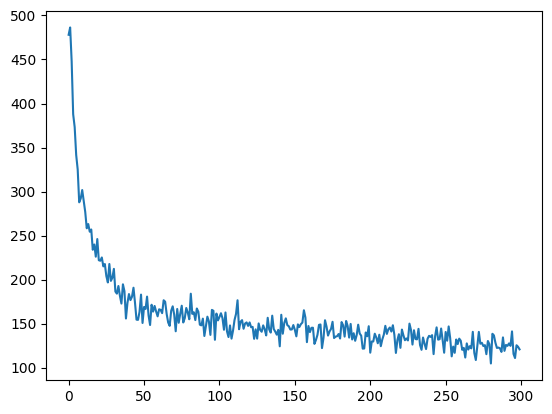

In [2]:
from smaksimovich.torch_utils import BasicNN
from matplotlib import pyplot as plt

hp = BasicNN.HyperParameters()
hp.lr = 0.001
hp.epochs = 300
hp.batch_size = 256
hp.weight_decay = 10e-4

epsilon = 1e-5
cross_entropy = lambda q, p: -torch.sum(p * torch.log(q + epsilon))
mse = lambda x, y: torch.sum((x - y)**2)
loss = lambda x, y: cross_entropy(torch.softmax(x[:, 0:9], dim=1), y[:, 0:9]) + mse(x[:, 9:10], y[:, 9:10])
model = BasicNN([27, 100, 100, 100, 100, 10], hp)
loss_plot, _ = model.train_nn(dataset, loss_fn=loss)
model.save_to_file("ttt_solved.pth")

plt.plot(list(range(len(loss_plot))), loss_plot)

In [3]:
# Get the accuracy of the model
# i.e. if the best action it produces is actually the best action

action_probabilites = torch.stack([ y_i[0:9] for y_i in y ])
max_actions = torch.max(action_probabilites, dim=1).values.reshape((-1, 1))
max_actions = max_actions == action_probabilites
best_actions = [[] for j in range(len(y))]
for j in range(len(y)):
    for i in range(9):
        if max_actions[j, i]:
            best_actions[j].append(i)

X = torch.stack(x)
model_y = model(X)
model_probabilites = model_y[:, 0:9]
model_actions = torch.argmax(model_probabilites, dim=1)

assert model_actions.shape == (len(y),), f"Expected {(len(y),)} got {model_actions.shape}"

total_correct = 0
for j in range(len(y)):
    if model_actions[j].item() in best_actions[j]:
        total_correct += 1

percent_correct = total_correct / len(y)
print(f"total correct = {total_correct} / {len(y)} = {percent_correct}")

total correct = 4510 / 4520 = 0.9977876106194691


In [4]:
t = torch.tensor([1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0])

y_i = model(t)
print(y_i)
print(torch.softmax(y_i[0:9], dim=0))

tensor([-0.9715, -2.3127, -1.2604, -3.7181,  0.0391, -3.3123, -0.1719, -2.9173,
        -0.8784,  0.0668], grad_fn=<AddBackward0>)
tensor([0.1193, 0.0312, 0.0894, 0.0077, 0.3277, 0.0115, 0.2654, 0.0170, 0.1309],
       grad_fn=<SoftmaxBackward0>)


In [5]:
# t = torch.tensor([[1, 2], [2, 4]], dtype=torch.float)
t = torch.tensor([[1],[2]])

res = [[1, 2], [3]]
print(t)

# torch.max(t, dim=1)
# torch.softmax(t, dim=1)

tensor([[1],
        [2]])
